In [1]:
from IPython.display import Image
Image(url= "https://images4.alphacoders.com/617/thumb-1920-617213.jpg")

# <center><h1>Team F - Titanic Group Project </center></h1>

* Cinthia Gomez                                
* Rodrigo Morales
* Jaime Bereincua 
* Luis Yepes
* Nicolás Ortiz Freuler
* Pedro Vallarino
* Stanislas de Foucault

### Setup
The group project consists on working with the Titanic dataframe where, using Pandas, we will make different adjustments to extract and/or modify the data contained. Thus, the libraries we will use through the project are the following:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exercise 1: Reading Titanic.csv 
The titanic.csv file was previously uploaded in our Jupyter Notebook - from the individual assignment - and can also be found in the following link: https://www.kaggle.com/c/titanic/data (where we will use the train.csv)

In [3]:
titanic = pd.read_csv('titanic2.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic['Last_Name'] = titanic['Name'].apply(lambda x: x.split(',')[0])
titanic['Name'] = titanic['Name'].apply(lambda x: x.split(',')[1])
titanic['Name'] = titanic['Name'] + ', ' + titanic['Last_Name']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Last_Name
0,1,0,3,"Mr. Owen Harris, Braund",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Mrs. John Bradley (Florence Briggs Thayer), C...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Miss. Laina, Heikkinen",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Mrs. Jacques Heath (Lily May Peel), Futrelle",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Mr. William Henry, Allen",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [5]:
del titanic['Last_Name']

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Mr. Owen Harris, Braund",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Mrs. John Bradley (Florence Briggs Thayer), C...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Miss. Laina, Heikkinen",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Mrs. Jacques Heath (Lily May Peel), Futrelle",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Mr. William Henry, Allen",male,35.0,0,0,373450,8.0500,NaN,S


To understand more on the data: type, length, amount of nulls per variable and memory usage we used `.info()`

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we can observe the `Age`column has 177 null values, the `Cabin`column contains information for nearly 23% of all passengers - being mainly composed of nulls the variable - and finally we can also notice that there is information missing regarding 2 passengers in the `Embarked`column.

Having observed this, we decided that we will use the `PassengerId`column as our index for the project. 

In [8]:
titanic = titanic.set_index('PassengerId')

In [9]:
titanic.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Mr. Owen Harris, Braund",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Mrs. John Bradley (Florence Briggs Thayer), C...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Miss. Laina, Heikkinen",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Mrs. Jacques Heath (Lily May Peel), Futrelle",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Mr. William Henry, Allen",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Mr. James, Moran",male,NaN,0,0,330877,8.4583,NaN,Q


Furthermore, we observed that the `Survived`column could better express the information by casting the variable into a boolean type:

In [10]:
titanic['Survived'] = titanic['Survived'].astype(bool)

Furthermore, it is generally a good practice to obtain a feeling of the existing values - to check later results and evaluate if they are within range and are also a logical output. To do this we can use the `describe()`function:

In [11]:
titanic.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic.head(6) #The first 6 passenger values as a reference

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,3,"Mr. Owen Harris, Braund",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,True,1,"Mrs. John Bradley (Florence Briggs Thayer), C...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,True,3,"Miss. Laina, Heikkinen",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,True,1,"Mrs. Jacques Heath (Lily May Peel), Futrelle",female,35.0,1,0,113803,53.1000,C123,S
5,False,3,"Mr. William Henry, Allen",male,35.0,0,0,373450,8.0500,NaN,S
6,False,3,"Mr. James, Moran",male,NaN,0,0,330877,8.4583,NaN,Q


### <center><h1> Part I: First Percentage Analysis </center></h1>

Having the table with the first adjustments ready, we will proceed to compute:

* The percentage of survivors out of total number of passengers and the percentage of men and women out of total number of passengers 

* The percentage of survivors by sex (i.e. the percentage of male passengers that survived and female passengers that survived) and the sex distribution of survivors (i.e. percentage of survivors that were men and percentage of survivors that were women)
* Display in a DataFrame the probability of survival/not survival of all combinations of sex and class

In [13]:
Survived = titanic.loc[titanic['Survived'] == True].count()[1]
Died = titanic.loc[titanic['Survived'] == False].count()[1]
#The index [1] was used for the count values only to referr to the Survived column and not all the table

In [14]:
#To obtain the percentage survival rate we can do the following simple computation:

print("{:.1%}".format(Survived/(Survived+Died)))

38.4%


We considered that the best way to approach the first part of the _Survival_ analysis was by creating a pie chart that would visually express how many passengers actually survived the tragedy. To build the graph we used the `.loc`function and created two variables: `Survived`and `Died` that extracted and counted the boolean values from the `Survived`column.

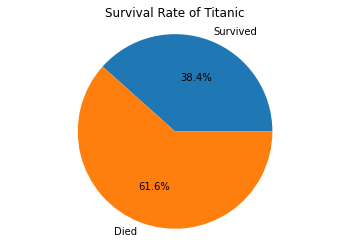

In [15]:
mylabels = ['Survived', 'Died']

fig, ax = plt.subplots()
ax.pie([Survived, Died], labels=mylabels, autopct='%0.0001f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Survival Rate of Titanic')


plt.show()

To find the percentage of men and women onboard the titanic we could follow a similar approach:

In [16]:
male = titanic.loc[titanic['Sex']=='male'].count()[3]
female = titanic.loc[titanic['Sex']=='female'].count()[3]

In [17]:
#Percentage of male on board:
print("{:.2%}".format(male/(male+female)))

64.76%


In [18]:
#Percentage of females onboard:
print("{:.2%}".format(female/(male+female)))

35.24%


Combining the different information we could group the information to display in a more convenient way by using the `groupby()`function we can get an idea on the survival probability by sex. 

To obtain the percentage out of the total number of passengers we divide by 8.91 since: _(count * 100 / 891) = count / 8.91_

In [19]:
titanic.groupby(['Sex','Survived'])['Survived'].count()/8.91

Sex     Survived
female  False        9.090909
        True        26.150393
male    False       52.525253
        True        12.233446
Name: Survived, dtype: float64

This output can be improved for its display by using a `crosstab` that would enable us to cross the different columns from the dataframe and then, by using a `lambda` operator we can convert the values to percentages by dividing by the length of the titanic dataframe

In [20]:
pd.crosstab(titanic["Sex"], titanic["Survived"]).apply(lambda row: (row/len(titanic))*100)

Survived,False,True
Sex,,
female,9.090909,26.150393
male,52.525253,12.233446


In [21]:
pd.crosstab(titanic['Sex'], titanic['Survived'], normalize='all', margins=True)

Survived,False,True,All
Sex,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
All,0.616162,0.383838,1.000000


From the results, one can notice that the chances of surviving in the Titanic - given you are a male - were sensibly lower than the odds for women. The case becomes even more interesting when one filters the result by the different classes from the Titanic (contained in the column `Pclass`). 

To obtain a glimpse on these values we can do the following `groupby` operation:

In [22]:
titanic.groupby(['Survived','Sex', 'Pclass']).count()['Name'] #Name used to filter as it has no-null values

Survived  Sex     Pclass
False     female  1           3
                  2           6
                  3          72
          male    1          77
                  2          91
                  3         300
True      female  1          91
                  2          70
                  3          72
          male    1          45
                  2          17
                  3          47
Name: Name, dtype: int64

From this preliminary table we can notice an uneven distribution on the survival rates according to classes where out of 81 women who died on the Titanic, only 3 (less than 4%) were from first class.

To improve this output and create a more elegant display we can create a `pivot_table`that will group the different variables while expressing the results in terms of percentage.

In [23]:
pd.pivot_table(
    
    titanic, 
    index=[titanic['Sex'], titanic['Pclass']], 
    columns=titanic["Survived"], 
    aggfunc='size',
    
).div(len(titanic)).mul(100)

Survived           False      True 
Sex    Pclass                      
female 1        0.336700  10.213244
       2        0.673401   7.856341
       3        8.080808   8.080808
male   1        8.641975   5.050505
       2       10.213244   1.907969
       3       33.670034   5.274972

Using the size function as the aggregator in this case, we then applied the same lambda operator to convert all the results into their corresponding percentages. 

## <center><h1> Part II: Missing Values Computation Strategies </center></h1>

As noticed when analyzing the data, the `Age`column has 177 values that are missing from the dataframe. Consequently, in data science, different strategies exist to compute for the missing values. 

The first step before making a strategy is understanding the distribution of the Age:

In [24]:
Age_Data = titanic.Age

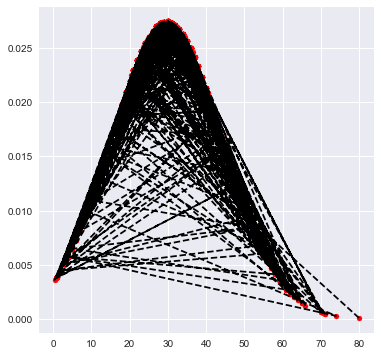

In [25]:
def pdf(age):
    mean = np.mean(age)
    std = np.std(age)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (age - mean)**2 / (2 * std**2))
    return y_out

y = pdf(Age_Data)
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))
plt.plot(Age_Data, y, color = 'black',
         linestyle = 'dashed')
  
plt.scatter(Age_Data, y, marker = 'o', s = 25, color = 'red')

plt.show()

From the graph, we can observe that the existing age follows a normal distribution which concentrates mainly at around age 30.

The 'Sex' variable, to perform our analysis was converted into a dummy variable encoded `{'female': 0, 'male':1}`

### Strategy 1: Using the 'Title' as proxy
The idea behind this strategy consists in extracting the different titles contained within the 'Name' column and, from the information obtained, compute the median for the different categories and then replace the null values with the applicable median. 

**Step 1**: Identify all the rows with missing `Age`

In [26]:
no_age = titanic.loc[titanic['Age'].isnull()]
no_age.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,False,3,"Mr. James, Moran",male,NaN,0,0,330877,8.4583,NaN,Q
18,True,2,"Mr. Charles Eugene, Williams",male,NaN,0,0,244373,13.0000,NaN,S
20,True,3,"Mrs. Fatima, Masselmani",female,NaN,0,0,2649,7.2250,NaN,C
27,False,3,"Mr. Farred Chehab, Emir",male,NaN,0,0,2631,7.2250,NaN,C
29,True,3,"Miss. Ellen ""Nellie"", O'Dwyer",female,NaN,0,0,330959,7.8792,NaN,Q


Creating a separate table allows us to deploy different tests without affecting our dataset and its values in the process and also work with only the passenger that have `NaN`values as age.

**Step 2**: Extract the title from the Name

In [27]:
no_age['Title'] = no_age['Name'].apply(lambda x: x.split(",")[0]).apply(lambda x: x.split(".")[0])
no_age.head()

<ipython-input-27-51792f080317>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_age['Title'] = no_age['Name'].apply(lambda x: x.split(",")[0]).apply(lambda x: x.split(".")[0])


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
6,False,3,"Mr. James, Moran",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
18,True,2,"Mr. Charles Eugene, Williams",male,NaN,0,0,244373,13.0000,NaN,S,Mr
20,True,3,"Mrs. Fatima, Masselmani",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
27,False,3,"Mr. Farred Chehab, Emir",male,NaN,0,0,2631,7.2250,NaN,C,Mr
29,True,3,"Miss. Ellen ""Nellie"", O'Dwyer",female,NaN,0,0,330959,7.8792,NaN,Q,Miss


In [28]:
cols = list(no_age.columns.values)

In [29]:
no_age = no_age[cols[0:2] + [cols[-1]]  +  cols[2:11]]

no_age.head()

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
6,False,3,Mr,"Mr. James, Moran",male,NaN,0,0,330877,8.4583,NaN,Q
18,True,2,Mr,"Mr. Charles Eugene, Williams",male,NaN,0,0,244373,13.0000,NaN,S
20,True,3,Mrs,"Mrs. Fatima, Masselmani",female,NaN,0,0,2649,7.2250,NaN,C
27,False,3,Mr,"Mr. Farred Chehab, Emir",male,NaN,0,0,2631,7.2250,NaN,C
29,True,3,Miss,"Miss. Ellen ""Nellie"", O'Dwyer",female,NaN,0,0,330959,7.8792,NaN,Q


Having extracted the Title category for all the fields: we can now see the different possible titles and the number of people under each category. 

In [30]:
no_age['Title'].value_counts()

 Mr        119
 Miss       36
 Mrs        17
 Master      4
 Dr          1
Name: Title, dtype: int64

**Step 3**: Knowing this information we can now apply the Title extraction formula to the entire data and create different categories for the different `titles` and their corresponding ages

In [31]:
titanic['Title'] = titanic['Name'].apply(lambda x: x.split(".")[0]).apply(lambda x: x.split(",")[0])
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,,
1,False,3,"Mr. Owen Harris, Braund",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,True,1,"Mrs. John Bradley (Florence Briggs Thayer), C...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,True,3,"Miss. Laina, Heikkinen",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,True,1,"Mrs. Jacques Heath (Lily May Peel), Futrelle",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,False,3,"Mr. William Henry, Allen",male,35.0,0,0,373450,8.0500,NaN,S,Mr


And we can order so the `Title`column appears before the name

In [32]:
titanic['Title'] = titanic['Title'].str.strip()

In [33]:
titanic = titanic[cols[0:2] + [cols[-1]]  +  cols[2:11]]
#titanic['Name'] = titanic['Name'].str.lstrip(str(titanic['Title']))
# When removing the title from the name, some of the Names (case PassengerId 4) were entirely stripped
#Attempting to do this by length of the title removed the entire string

titanic['Name'] = titanic['Name'].apply(lambda x: x.split(".")[1])
#Solution was not innovative - but applying the same code as to obtain the title, we can select what was initially discarded

titanic.head()

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,False,3,Mr,"Owen Harris, Braund",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,True,1,Mrs,"John Bradley (Florence Briggs Thayer), Cumings",female,38.0,1,0,PC 17599,71.2833,C85,C
3,True,3,Miss,"Laina, Heikkinen",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,True,1,Mrs,"Jacques Heath (Lily May Peel), Futrelle",female,35.0,1,0,113803,53.1000,C123,S
5,False,3,Mr,"William Henry, Allen",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
titanic['Title'] = titanic['Title'].str.strip()

**Step 4**: Explore the different categories median as a proxy for the different ages

_Category Mr:_

In [35]:
mr = titanic.loc[titanic['Title']=='Mr']['Age']
mr = mr.dropna()

In [36]:
mr.median()

30.0

In [37]:
titanic.loc[titanic['Title']=='Mr'].head()

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,False,3,Mr,"Owen Harris, Braund",male,22.0,1,0,A/5 21171,7.2500,NaN,S
5,False,3,Mr,"William Henry, Allen",male,35.0,0,0,373450,8.0500,NaN,S
6,False,3,Mr,"James, Moran",male,NaN,0,0,330877,8.4583,NaN,Q
7,False,1,Mr,"Timothy J, McCarthy",male,54.0,0,0,17463,51.8625,E46,S
13,False,3,Mr,"William Henry, Saundercock",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


_Category Miss_

In [38]:
miss = titanic.loc[titanic['Title']=='Miss']['Age']
miss = miss.dropna()

In [39]:
miss.median()

21.0

In [40]:
titanic.loc[titanic['Title']=='Miss'].head()

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
3,True,3,Miss,"Laina, Heikkinen",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
11,True,3,Miss,"Marguerite Rut, Sandstrom",female,4.0,1,1,PP 9549,16.7000,G6,S
12,True,1,Miss,"Elizabeth, Bonnell",female,58.0,0,0,113783,26.5500,C103,S
15,False,3,Miss,"Hulda Amanda Adolfina, Vestrom",female,14.0,0,0,350406,7.8542,NaN,S
23,True,3,Miss,"Anna ""Annie"", McGowan",female,15.0,0,0,330923,8.0292,NaN,Q


_Category Mrs_:

In [41]:
mrs = titanic.loc[titanic['Title']=='Mrs']['Age']
mrs = mrs.dropna()

In [42]:
mrs.median()

35.0

In [43]:
titanic.loc[titanic['Title']=='Mrs'].head()

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
2,True,1,Mrs,"John Bradley (Florence Briggs Thayer), Cumings",female,38.0,1,0,PC 17599,71.2833,C85,C
4,True,1,Mrs,"Jacques Heath (Lily May Peel), Futrelle",female,35.0,1,0,113803,53.1000,C123,S
9,True,3,Mrs,"Oscar W (Elisabeth Vilhelmina Berg), Johnson",female,27.0,0,2,347742,11.1333,NaN,S
10,True,2,Mrs,"Nicholas (Adele Achem), Nasser",female,14.0,1,0,237736,30.0708,NaN,C
16,True,2,Mrs,"(Mary D Kingcome) , Hewlett",female,55.0,0,0,248706,16.0000,NaN,S


_Category Master:_

In [44]:
master = titanic.loc[titanic['Title']== 'Master']['Age']
master = master.dropna()

In [45]:
master.median()

3.5

In [46]:
titanic.loc[titanic['Title']== 'Master'].head()

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
8,False,3,Master,"Gosta Leonard, Palsson",male,2.0,3,1,349909,21.0750,NaN,S
17,False,3,Master,"Eugene, Rice",male,2.0,4,1,382652,29.1250,NaN,Q
51,False,3,Master,"Juha Niilo, Panula",male,7.0,4,1,3101295,39.6875,NaN,S
60,False,3,Master,"William Frederick, Goodwin",male,11.0,5,2,CA 2144,46.9000,NaN,S
64,False,3,Master,"Harald, Skoog",male,4.0,3,2,347088,27.9000,NaN,S


_Category Dr:_

In [47]:
dr = titanic.loc[titanic['Title']== 'Dr']['Age']
dr = dr.dropna()

In [48]:
dr.median()

46.5

In [49]:
titanic.loc[titanic['Title']== 'Dr'].head()

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
246,False,1,Dr,"William Edward, Minahan",male,44.0,2,0,19928,90.00,C78,Q
318,False,2,Dr,"Ernest, Moraweck",male,54.0,0,0,29011,14.00,NaN,S
399,False,2,Dr,"Alfred, Pain",male,23.0,0,0,244278,10.50,NaN,S
633,True,1,Dr,"Max, Stahelin-Maeglin",male,32.0,0,0,13214,30.50,B50,C
661,True,1,Dr,"Henry William, Frauenthal",male,50.0,2,0,PC 17611,133.65,NaN,S


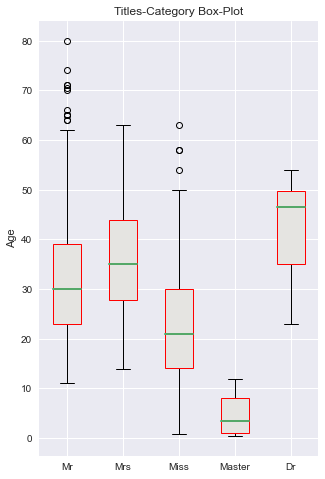

In [50]:
labels = ['Mr', 'Mrs', 'Miss', 'Master', 'Dr']
plt.figure(figsize=(5,8)) #xsize vs ysize

boxes = plt.boxplot([mr, mrs, miss, master, dr], labels=labels, patch_artist=True, medianprops={'linewidth': 2}) 
#patch for fill, medianprops = lines in middle

for box in boxes['boxes']:
    #set edge color
    box.set(color='red', linewidth=1)

    #change fill color
    box.set(facecolor='#e5e4e1')
    
    
plt.title('Titles-Category Box-Plot')
plt.ylabel('Age')

plt.show()

**Step 5**: Create a copy of the titanic dataframe and replace the missing values with the corresponding median values obtained

In [51]:
titanic_s1 = titanic.copy()
titanic_s1.head(6)

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,False,3,Mr,"Owen Harris, Braund",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,True,1,Mrs,"John Bradley (Florence Briggs Thayer), Cumings",female,38.0,1,0,PC 17599,71.2833,C85,C
3,True,3,Miss,"Laina, Heikkinen",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,True,1,Mrs,"Jacques Heath (Lily May Peel), Futrelle",female,35.0,1,0,113803,53.1000,C123,S
5,False,3,Mr,"William Henry, Allen",male,35.0,0,0,373450,8.0500,NaN,S
6,False,3,Mr,"James, Moran",male,NaN,0,0,330877,8.4583,NaN,Q


Since applying the `.loc`function to filter the columns by the title and then replacing the null values with the determined median was not providing correct answers, an alternative two-step approach was used:

1. Convert the Null values to the title
2. Use the `replace`function to map the title and replace with the median 

In [52]:
titanic_s1['Age'].fillna(titanic_s1['Title'], inplace=True)
titanic_s1.head(6)

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,False,3,Mr,"Owen Harris, Braund",male,22,1,0,A/5 21171,7.2500,NaN,S
2,True,1,Mrs,"John Bradley (Florence Briggs Thayer), Cumings",female,38,1,0,PC 17599,71.2833,C85,C
3,True,3,Miss,"Laina, Heikkinen",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,True,1,Mrs,"Jacques Heath (Lily May Peel), Futrelle",female,35,1,0,113803,53.1000,C123,S
5,False,3,Mr,"William Henry, Allen",male,35,0,0,373450,8.0500,NaN,S
6,False,3,Mr,"James, Moran",male,Mr,0,0,330877,8.4583,NaN,Q


In [53]:
titanic_s1['Age'] = titanic_s1['Age'].replace({'Mr':30, 'Miss':21, 'Mrs':35, 'Master':3.5, 'Dr':46.5})

In [54]:
titanic_s1.head(6)

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,False,3,Mr,"Owen Harris, Braund",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,True,1,Mrs,"John Bradley (Florence Briggs Thayer), Cumings",female,38.0,1,0,PC 17599,71.2833,C85,C
3,True,3,Miss,"Laina, Heikkinen",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,True,1,Mrs,"Jacques Heath (Lily May Peel), Futrelle",female,35.0,1,0,113803,53.1000,C123,S
5,False,3,Mr,"William Henry, Allen",male,35.0,0,0,373450,8.0500,NaN,S
6,False,3,Mr,"James, Moran",male,30.0,0,0,330877,8.4583,NaN,Q


In [55]:
titanic_s1['Age'].isnull().any()

False

As we can observe: the 6th row is no longer `null`and, being a 'Mr' its age was changed correctly to the median.

**Conclusion**: The strategy was initially a promising approach towards approximating the missing age values to the real values of the passengers. Nevertheless, the box-plot indicates that in some categories the range is high. Particularly the cases of Mr and Misses where the possible age covers a large spectrum. Thus inputing the median based on title could not be the best approximation strategy. 

The resulting descriptive solution can be seen below: 

In [56]:
titanic_s1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.390202,0.523008,0.381594,32.204208
std,0.836071,13.265322,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.910400
50%,3.000000,30.000000,0.000000,0.000000,14.454200
75%,3.000000,35.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


----

### Strategy 2: Building Age Proxy's
The objective behind this strategy consists on determining the age of the passenger by analyzing the different variables and using them as an approach in establishing the age based on correlation. 

To deploy this strategy the following steps were followed:

**Step 1**: Create a copy of the raw titanic dataframe and create a new variable: Category (which will bin the different age groups)

In [57]:
titanic_s2 = titanic.copy()

In [58]:
titanic_s2.head(6)

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,False,3,Mr,"Owen Harris, Braund",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,True,1,Mrs,"John Bradley (Florence Briggs Thayer), Cumings",female,38.0,1,0,PC 17599,71.2833,C85,C
3,True,3,Miss,"Laina, Heikkinen",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,True,1,Mrs,"Jacques Heath (Lily May Peel), Futrelle",female,35.0,1,0,113803,53.1000,C123,S
5,False,3,Mr,"William Henry, Allen",male,35.0,0,0,373450,8.0500,NaN,S
6,False,3,Mr,"James, Moran",male,NaN,0,0,330877,8.4583,NaN,Q


We constructed a category feature by breaking the existing age range into 4 categories: Infant, Mid-Age, Senior and Old-Age. The corresponding age for each category seeked minimize the estimation error and reflect the visible distribution.

In [59]:
titanic_s2['Age_Category'] = pd.cut(titanic_s2.Age,bins=[0,15,35,55,100],labels=['Infant','Mid-Age','Senior','Old-Age'])

In [60]:
titanic_s2.head(6)

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category
PassengerId,,,,,,,,,,,,,
1,False,3,Mr,"Owen Harris, Braund",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mid-Age
2,True,1,Mrs,"John Bradley (Florence Briggs Thayer), Cumings",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior
3,True,3,Miss,"Laina, Heikkinen",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Mid-Age
4,True,1,Mrs,"Jacques Heath (Lily May Peel), Futrelle",female,35.0,1,0,113803,53.1000,C123,S,Mid-Age
5,False,3,Mr,"William Henry, Allen",male,35.0,0,0,373450,8.0500,NaN,S,Mid-Age
6,False,3,Mr,"James, Moran",male,NaN,0,0,330877,8.4583,NaN,Q,NaN


**Step 2**: 
Having created the bining categories the next step is to determine which variables are relevant when evluating age and what information do they transmit for each age-tier. 

Since the 'Embarked' variable has no clear ordering - we will evaluate it separately. 

In [61]:
corr_matrix = titanic.corr()
corr_matrix

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

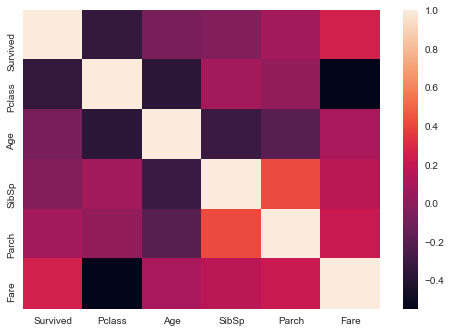

In [62]:
sns.heatmap(corr_matrix)

In [63]:
pd.pivot_table(
    
    titanic_s2, 
    index=[titanic_s2["Sex"], titanic_s2["Pclass"]], 
    columns=[titanic_s2["Survived"], titanic_s2["Age_Category"]], 
    aggfunc='size'

)

Survived       False                         True                        
Age_Category  Infant Mid-Age Senior Old-Age Infant Mid-Age Senior Old-Age
Sex    Pclass                                                            
female 1           1       1      1       0      2      43     30       7
       2           0       3      2       1     10      41     17       0
       3          14      29     12       0     16      28      2       1
male   1           0      16     29      16      3      16     18       3
       2           0      56     23       5      9       4      1       1
       3          19     151     39       6      9      26      3       0

The table shows the distribution per class and the survival rate at the different age levels

In [64]:
pd.pivot_table(
    
    titanic_s2, 
    index= titanic_s2.Parch, 
    columns=[titanic_s2["Age_Category"]], aggfunc='size'
).div(len(titanic)).mul(100) #Added to normalize the data

Age_Category,Infant,Mid-Age,Senior,Old-Age
Parch,,,,
0,1.234568,38.945006,14.702581,3.591470
1,4.377104,4.152637,3.142536,0.673401
2,3.703704,2.918070,0.897868,0.112233
3,0.000000,0.336700,0.224467,0.000000
4,0.000000,0.112233,0.224467,0.112233
5,0.000000,0.000000,0.561167,0.000000
6,0.000000,0.000000,0.112233,0.000000


In [65]:
pd.crosstab(titanic_s2["Age_Category"], titanic["Survived"], margins=True)

Survived,False,True,All
Age_Category,,,
Infant,34,49,83
Mid-Age,256,158,414
Senior,106,71,177
Old-Age,28,12,40
All,424,290,714


In [66]:
titanic_s2.loc[titanic_s2['Age_Category']=='Infant']['Embarked'].value_counts()

S    60
C    18
Q     5
Name: Embarked, dtype: int64

In [67]:
titanic_s2.loc[titanic_s2['Age_Category']=='Old-Age']['Embarked'].value_counts()

S    25
C    11
Q     3
Name: Embarked, dtype: int64

In [68]:
titanic_s2.loc[titanic_s2['Age_Category']=='Mid-Age']['Embarked'].value_counts() #Variable does not add information

S    330
C     68
Q     16
Name: Embarked, dtype: int64

In [69]:
titanic_s2.loc[titanic_s2['Age_Category']=='Infant']['SibSp'].value_counts()

1    27
0    23
4    16
3     7
2     6
5     4
Name: SibSp, dtype: int64

In [70]:
titanic_s2.loc[titanic_s2['Age_Category']=='Senior']['SibSp'].value_counts()

0    113
1     59
2      5
Name: SibSp, dtype: int64

In [71]:
pd.pivot_table(
    
    titanic_s2, 
    index= titanic_s2["SibSp"], 
    columns=[titanic_s2["Age_Category"]], aggfunc='size'
)

Age_Category,Infant,Mid-Age,Senior,Old-Age
SibSp,,,,
0,23,301,113,34
1,27,91,59,6
2,6,14,5,0
3,7,5,0,0
4,16,2,0,0
5,4,1,0,0
8,0,0,0,0


<AxesSubplot:xlabel='SibSp'>

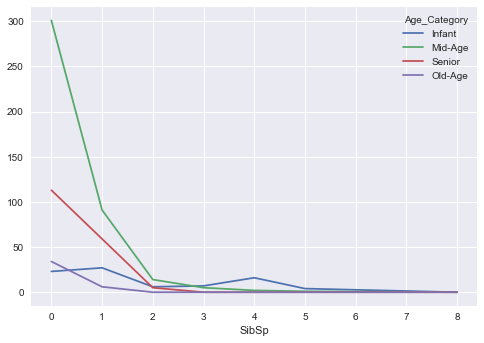

In [72]:
pd.pivot_table(
    
    titanic_s2, 
    index= titanic_s2["SibSp"], 
    columns=[titanic_s2["Age_Category"]], aggfunc='size'
).plot()


In [73]:
pd.crosstab(titanic_s2["Pclass"], titanic_s2["Age_Category"], margins=True)
#distribution of ages different of NaN in the DataFrame

Age_Category,Infant,Mid-Age,Senior,Old-Age,All
Pclass,,,,,
1,6,76,78,26,186
2,19,104,43,7,173
3,58,234,56,7,355
All,83,414,177,40,714


<AxesSubplot:xlabel='Pclass'>

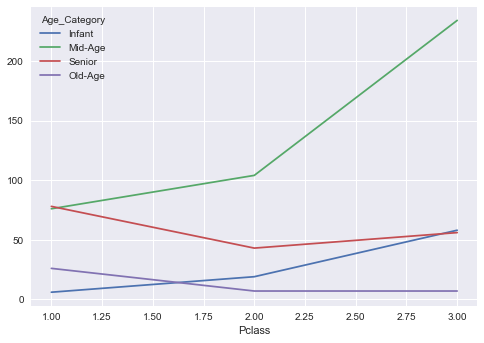

In [74]:
pd.crosstab(titanic_s2["Pclass"], titanic_s2["Age_Category"]).plot()

An interesting/potential correlation could be taking place from which we could take advantage to evaluate the different potential ages

With this correlation matrix and the tables studied before for each age group we determined the following approximation approach: 

* **Infants**:The data indicates that they show a higher probability of survival, tend to travel 3rd Class and have a higher probability of travelling with one or both parents (Parch).
* **Mid-Age**: As expected, this is the most frequent category concentrating 46.5% of the passengers. On average, they traveled with a partner or family (SibSp > 1). 
* **Senior:Show**: Have the lowest overall frequency, and tend to travel first-class and has more than 4 Sibiling
* **Old-Age**: Travel first class, show a high survival rate and tend to travel alone. 

With this information we could create conditions that determine the probability of corresponding to the different bins and apply the median age of each bin. 

To achieve this the `Estimated_Age`column is created and initially filled with the mid age of the most frequent group: Mid-Age

In [75]:
titanic_s2['Estimated_Age'] = titanic_s2['Age']
titanic_s2.loc[titanic_s2['Estimated_Age']>0,'Estimated_Age'] = 25 
titanic_s2['Estimated_Age'] = titanic_s2['Estimated_Age'].fillna(25) #mid-point of most frequent bin is 25years
titanic_s2.head(6)

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Estimated_Age
PassengerId,,,,,,,,,,,,,,
1,False,3,Mr,"Owen Harris, Braund",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mid-Age,25.0
2,True,1,Mrs,"John Bradley (Florence Briggs Thayer), Cumings",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior,25.0
3,True,3,Miss,"Laina, Heikkinen",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Mid-Age,25.0
4,True,1,Mrs,"Jacques Heath (Lily May Peel), Futrelle",female,35.0,1,0,113803,53.1000,C123,S,Mid-Age,25.0
5,False,3,Mr,"William Henry, Allen",male,35.0,0,0,373450,8.0500,NaN,S,Mid-Age,25.0
6,False,3,Mr,"James, Moran",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,25.0


Having created the variable, the objective now is applying the conditions identified and adjusting the age according to the mid-point of each of the bins. 

In [76]:
#Adjusting for Infants:

titanic_s2.loc[
    
    (titanic_s2['Survived'] == True) & (titanic_s2['Pclass'] == 3) & (titanic_s2['Parch'] > 1), 
    
    'Estimated_Age'] = 7.5

In [77]:
#Adjusting for Senior

titanic_s2.loc[

(titanic_s2['SibSp'] > 3) & (titanic_s2['Pclass'] == 2),
            'Estimated_Age'] = 45

In [78]:
#Adjusting for Old_Age

titanic_s2.loc[
    
(titanic_s2['Pclass'] == 1) & (titanic_s2['Survived'] == True),
        'Estimated_Age'] = 60

In [79]:
titanic_s2.head(10)

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Estimated_Age
PassengerId,,,,,,,,,,,,,,
1,False,3,Mr,"Owen Harris, Braund",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mid-Age,25.0
2,True,1,Mrs,"John Bradley (Florence Briggs Thayer), Cumings",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior,60.0
3,True,3,Miss,"Laina, Heikkinen",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Mid-Age,25.0
4,True,1,Mrs,"Jacques Heath (Lily May Peel), Futrelle",female,35.0,1,0,113803,53.1000,C123,S,Mid-Age,60.0
5,False,3,Mr,"William Henry, Allen",male,35.0,0,0,373450,8.0500,NaN,S,Mid-Age,25.0
6,False,3,Mr,"James, Moran",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,25.0
7,False,1,Mr,"Timothy J, McCarthy",male,54.0,0,0,17463,51.8625,E46,S,Senior,25.0
8,False,3,Master,"Gosta Leonard, Palsson",male,2.0,3,1,349909,21.0750,NaN,S,Infant,25.0
9,True,3,Mrs,"Oscar W (Elisabeth Vilhelmina Berg), Johnson",female,27.0,0,2,347742,11.1333,NaN,S,Mid-Age,7.5


To analyze the technical quality of our assesment we can create a column that measures the error in our estimated model:

In [80]:
titanic_s2['Pred_Error'] = (titanic_s2['Age'] - titanic_s2['Estimated_Age'])
titanic_s2.describe()['Pred_Error']

count    714.000000
mean      -0.987157
std       17.802792
min      -59.080000
25%       -9.000000
50%       -1.000000
75%        9.000000
max       49.000000
Name: Pred_Error, dtype: float64

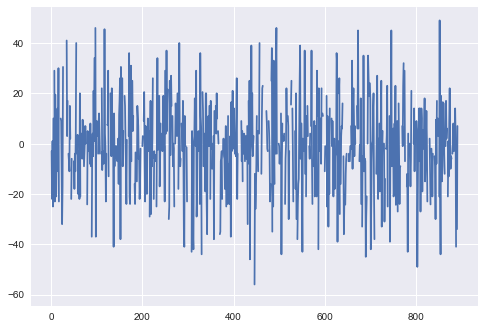

In [81]:
plt.plot(titanic_s2['Pred_Error'])

**Final Step**: Replace the missing values with our predictions

In [82]:
titanic_s2['Age'].fillna(titanic_s2['Estimated_Age'], inplace=True)
titanic_s2.head(6)

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Category,Estimated_Age,Pred_Error
PassengerId,,,,,,,,,,,,,,,
1,False,3,Mr,"Owen Harris, Braund",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mid-Age,25.0,-3.0
2,True,1,Mrs,"John Bradley (Florence Briggs Thayer), Cumings",female,38.0,1,0,PC 17599,71.2833,C85,C,Senior,60.0,-22.0
3,True,3,Miss,"Laina, Heikkinen",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Mid-Age,25.0,1.0
4,True,1,Mrs,"Jacques Heath (Lily May Peel), Futrelle",female,35.0,1,0,113803,53.1000,C123,S,Mid-Age,60.0,-25.0
5,False,3,Mr,"William Henry, Allen",male,35.0,0,0,373450,8.0500,NaN,S,Mid-Age,25.0,10.0
6,False,3,Mr,"James, Moran",male,25.0,0,0,330877,8.4583,NaN,Q,NaN,25.0,NaN


In [83]:
titanic_s2['Age'].isnull().any()

False

The missing value was effectively changed in the dataframe for our prediction. The new disperson is the following:

In [84]:
titanic_s2.describe()['Age']

count    891.000000
mean      29.295926
std       13.707860
min        0.420000
25%       22.000000
50%       25.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

---

### Model Comparison Tables:

Compare the two strategies by computing the standard deviation of the overall Age column after applying each of them, as well as the standard deviation of each group of sex and class.

The best way to achieve this would be to add two columns to our `Titanic`dataframe that reference the calcualted ages.

In [85]:
titanic['Age_s1'] = titanic_s1['Age']
titanic['Age_s2'] = titanic_s2['Age']

titanic.head(10).style.set_properties( **{'text-align': 'center'}) #Centered for visually better read

,Survived,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_s1,Age_s2
PassengerId,,,,,,,,,,,,,,
1,False,3,Mr,"Owen Harris, Braund",male,22.000000,1,0,A/5 21171,7.250000,nan,S,22.000000,22.000000
2,True,1,Mrs,"John Bradley (Florence Briggs Thayer), Cumings",female,38.000000,1,0,PC 17599,71.283300,C85,C,38.000000,38.000000
3,True,3,Miss,"Laina, Heikkinen",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S,26.000000,26.000000
4,True,1,Mrs,"Jacques Heath (Lily May Peel), Futrelle",female,35.000000,1,0,113803,53.100000,C123,S,35.000000,35.000000
5,False,3,Mr,"William Henry, Allen",male,35.000000,0,0,373450,8.050000,nan,S,35.000000,35.000000
6,False,3,Mr,"James, Moran",male,nan,0,0,330877,8.458300,nan,Q,30.000000,25.000000
7,False,1,Mr,"Timothy J, McCarthy",male,54.000000,0,0,17463,51.862500,E46,S,54.000000,54.000000
8,False,3,Master,"Gosta Leonard, Palsson",male,2.000000,3,1,349909,21.075000,nan,S,2.000000,2.000000
9,True,3,Mrs,"Oscar W (Elisabeth Vilhelmina Berg), Johnson",female,27.000000,0,2,347742,11.133300,nan,S,27.000000,27.000000


In [86]:
titanic.groupby(["Sex", "Pclass"])[["Age_s1", "Age_s2"]].std()

Age_s1     Age_s2
Sex    Pclass                      
female 1       13.013434  14.958663
       2       12.760732  12.714067
       3       11.189362  10.872765
male   1       14.401299  15.397107
       2       14.159550  14.247510
       3       10.796579  10.398827

<AxesSubplot:xlabel='Sex,Pclass'>

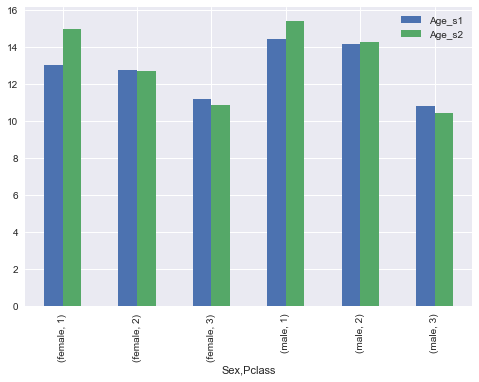

In [87]:
titanic.groupby(["Sex", "Pclass"])[["Age_s1", "Age_s2"]].std().plot.bar()

In [88]:
Age_Data = titanic["Age"]
Age_s1 = titanic["Age_s1"]
Age_s2 = titanic["Age_s2"]

In [89]:
Age_Data.dropna(inplace=True)
Age_Data.std()

14.526497332334044

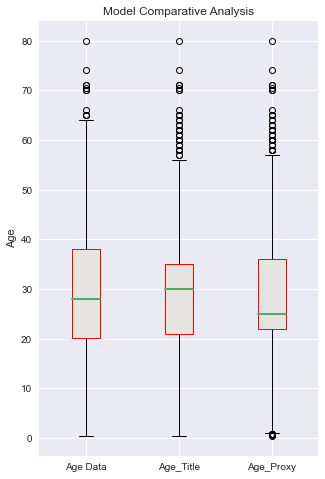

In [90]:
labels = ['Age Data', 'Age_Title', 'Age_Proxy']
plt.figure(figsize=(5,8)) #xsize vs ysize

boxes = plt.boxplot([Age_Data, Age_s1, Age_s2], labels=labels, patch_artist=True, medianprops={'linewidth': 2}) 
#patch for fill, medianprops = lines in middle

for box in boxes['boxes']:
    #set edge color
    box.set(color='red', linewidth=1)

    #change fill color
    box.set(facecolor='#e5e4e1')
    
    
plt.title('Model Comparative Analysis')
plt.ylabel('Age')

plt.show()

# <h1><center> THANK YOU </center></h1>

In [91]:
Image(url= "https://nerdist.com/wp-content/uploads/2020/03/MV5BZWQyMzIxNzgtMzc1NS00MWY0LThmN2UtNDAyODAwZmRkMjcyXkEyXkFqcGdeQXVyMjMzMDI4MjQ@._V1_SX1777_CR001777999_AL_.jpg")